# Table of Contents

------
-  [1. Support vector machines](#Support-vector-machines)
    - [1.1 Linear SVM](#Linear-SVM)
        - [Question 1](#Question-1)
        
    - [1.2 Nonlinear SVM](#Nonlinear-SVM)
        - [Question 2](#Question-2)
    - [1.3 Cross validation](#Cross-validation)
        - [Question 3](#Question-3)

- [2. Neural networks](#Neural-networks)
    - [Question 4](#Question-4)

- [3. Spam classification](#Spam-classification)
    - [3.1 Preprocessing](#Preprocessing)
    - [3.2 Vocabulary list](#Vocabulary-list)
    - [3.2 Feature extraction](#Feature-extraction)
        - [Question 5](#Question-5)
    - [3.3 SVM training](#SVM-training)
        - [Question 6](#Question-6)
        - [Question 7](#Question-7)
        - [Question 8](#Question-8)
------

# Support vector machines

In the first part of this laboratory session, you will gain an intuition of 
- how SVMs work
- how to use a Gaussian kernel
- how to set the associated parameters

## Linear SVM

Let us begin with a 2D dataset that can be separated by a linear split.

In [1]:
load("data1")
summary(df)

       x1               x2              y         
 Min.   :0.0864   Min.   :1.618   Min.   :0.0000  
 1st Qu.:1.5725   1st Qu.:2.636   1st Qu.:0.0000  
 Median :2.2753   Median :3.071   Median :0.0000  
 Mean   :2.2688   Mean   :3.133   Mean   :0.4118  
 3rd Qu.:2.9550   3rd Qu.:3.531   3rd Qu.:1.0000  
 Max.   :4.0150   Max.   :4.616   Max.   :1.0000  

You can visualize the data as points in a two-dimensional space (using a different color according to which class they belong to). 

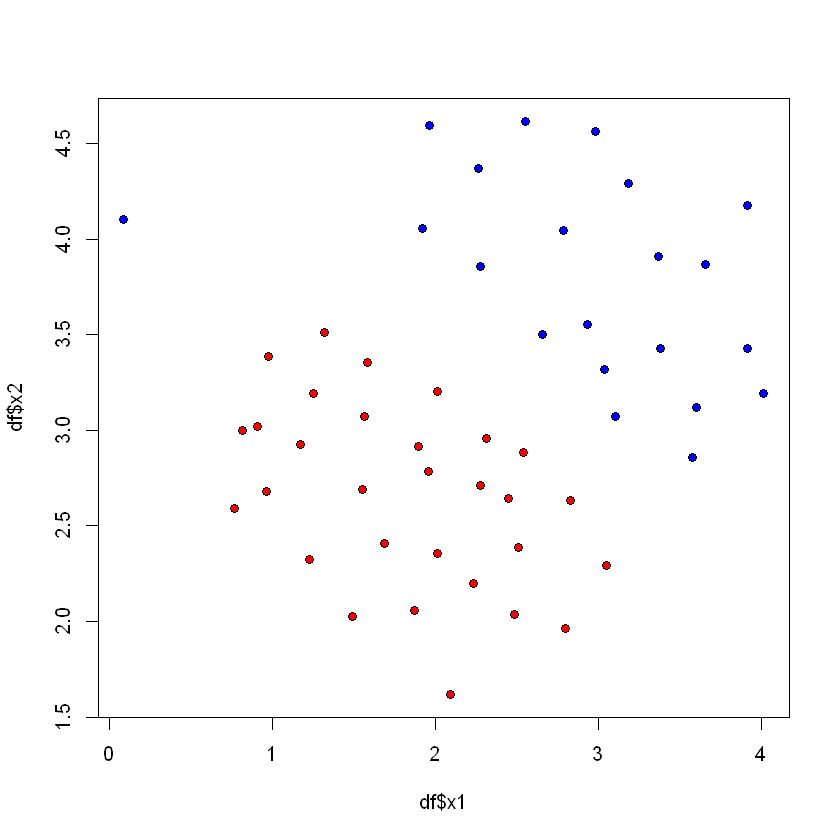

In [2]:
plot( df$x1, df$x2, pch=21, bg=c("red","blue")[df$y+1] )

As you can see in the scatter plot, the position of the samples suggests a natural separation. 

However, there is an outlier on the far left: as part of this first exercise, you will also see how this outlier affects the SVM.

In order to train a SVM, you need the package **kernlab**.

In [3]:
#install.packages("kernlab")

library(kernlab)

Warning message:
: package 'kernlab' was built under R version 3.2.3

Then, you can train a SVM with the function **ksvm**.

In [4]:
svm = ksvm( y ~ x2 + x1, data=df, type="C-svc", kernel='vanilladot' )
svm

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 11 

Objective Function Value : -6.4383 
Training error : 0.019608 

To gain a better insight into the classification, you can visualize how the trained SVM splits the data. 

The function defined below allows you to do exactly that.

In [5]:
showSVM <- function(svm, frame, margin=TRUE, support=TRUE)
{
    # create a grid of points
    hs <- 0.01
    x1_min <- min( frame[,1]) - 0.01 
    x1_max <- max( frame[,1]) + 0.01
    x2_min <- min( frame[,2]) - 0.01 
    x2_max <- max( frame[,2]) + 0.01
    grid <- as.matrix(expand.grid( seq(x1_min, x1_max, by = hs), seq(x2_min, x2_max, by =hs) ))
    grid <- data.frame( x1 = grid[,1], x2 = grid[,2] )
    
    # predict with the SVM
    y = predict(svm, newdata = grid, type="decision")
    
    # visualize points
    plot( frame[,1], frame[,2], pch=21, cex=0.8, bg=c("red","blue")[frame[,3]+1] )
    
    # highlight the support vectors
    idx = unlist( alphaindex(svm) )
    if(support)
        points( frame[idx,1], frame[idx,2], col=c("red","blue")[frame[idx,3]+1], pch=5, cex=1.5)
    
    # visualize the decision hyperplane
    x1 = seq(x1_min,x1_max,by=hs)
    x2 = seq(x2_min,x2_max,by=hs)
    y <- matrix(y, nrow = length(x1), byrow = FALSE)
    contour( x1, x2, y, levels=0, lwd=3, lty=1, drawlabels = FALSE, add=TRUE )
        
    # visualize the margins
    if(margin)
        contour( x1, x2, y, levels=c(-1,1), lwd = 1, lty=2, drawlabels = FALSE, add=TRUE )    
        
}

Invoke the function **showSVM** to visualize the SVM you just trained.

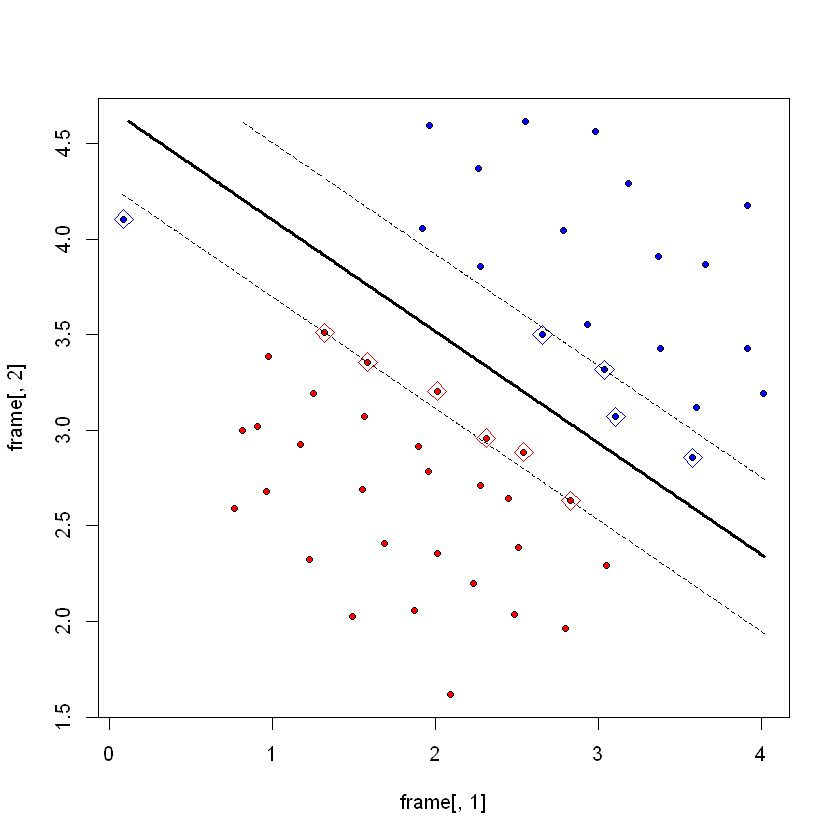

In [6]:
showSVM(svm, df)

Alternatively, you can use the built-in function **plot**.

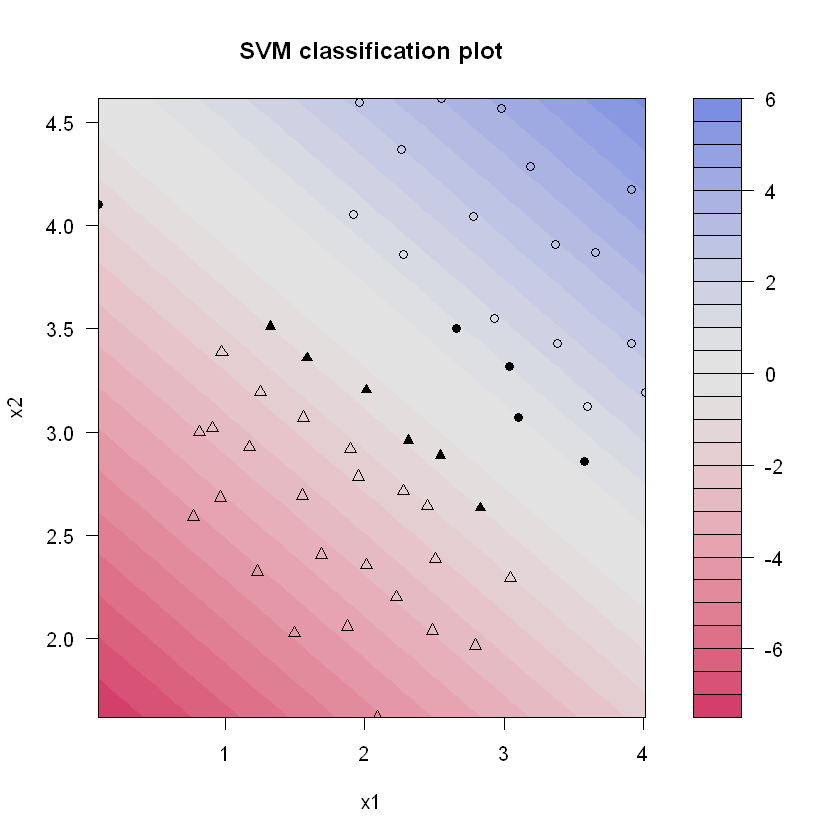

In [7]:
plot(svm, data=df)

Remember that the SVM has a parameter **C** which controls the penalty for misclassified training samples. 

***A large value of C tells the SVM to try to classify all the examples correctly.***
    
By default, the function **ksvm** sets **C = 1**, but you can specify a different value with the input **C**.

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 12 

Objective Function Value : -7.7315 
Training error : 0.019608 

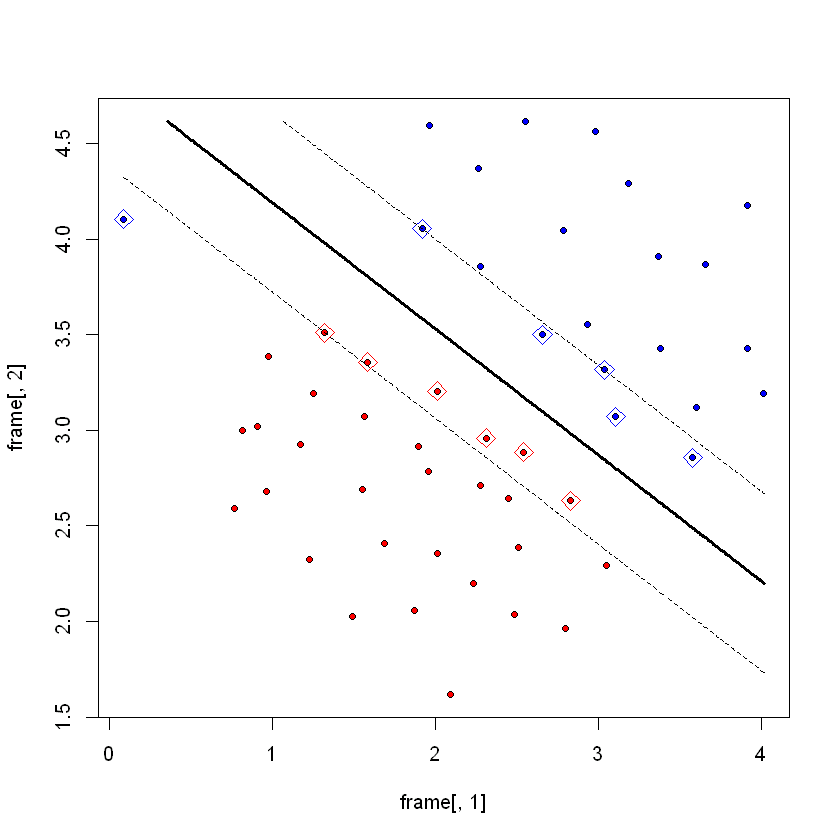

In [8]:
lambda = 1;

svm = ksvm( y ~ x2 + x1, data=df, type="C-svc", kernel='vanilladot', C=lambda, scaled=FALSE )
svm

showSVM(svm, df)

---

### Question 1
Your task is to try different values of **C** on this dataset. 
 - Can you set **C** such that all samples are correctly classified? 
 - How does the margin change by increasing/reducing **C**? 
 - In your opinion, should the value of **C** be small or large in order to have a classifier that performs well on new data?
 
---

## Nonlinear SVM

Let us switch to a 2D dataset that can be only separated by a nonlinear split.

       x1                x2               y         
 Min.   :0.04493   Min.   :0.4026   Min.   :0.0000  
 1st Qu.:0.29263   1st Qu.:0.5570   1st Qu.:0.0000  
 Median :0.51267   Median :0.6937   Median :1.0000  
 Mean   :0.50341   Mean   :0.6943   Mean   :0.5562  
 3rd Qu.:0.69931   3rd Qu.:0.8304   3rd Qu.:1.0000  
 Max.   :0.99885   Max.   :0.9886   Max.   :1.0000  

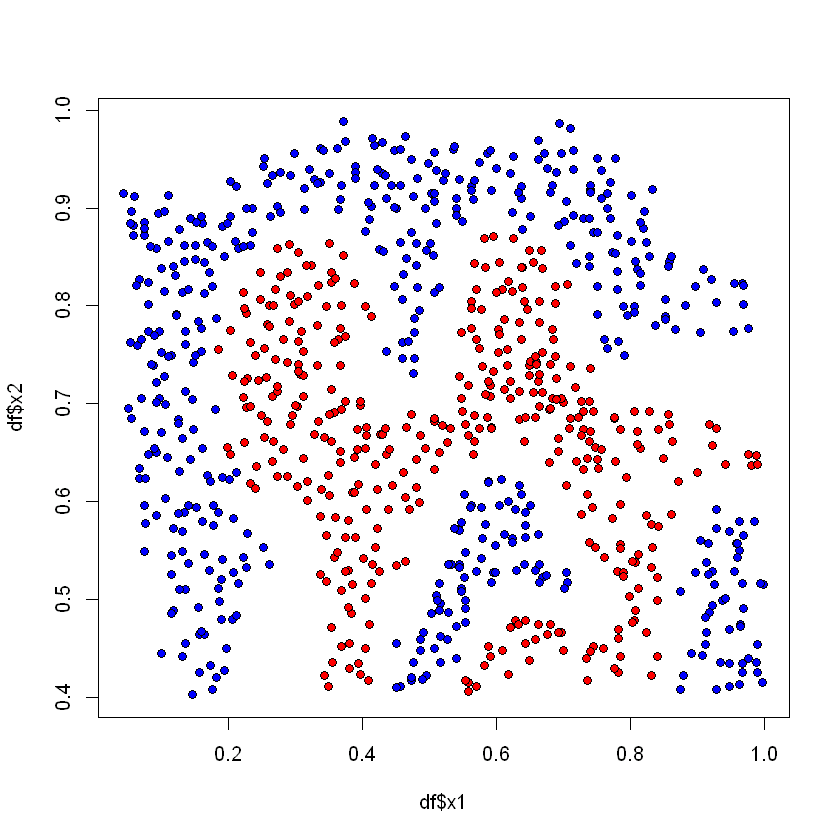

In [9]:
load("data2")

summary(df)

plot( df$x1, df$x2, pch=21, bg=c("red","blue")[df$y+1] )

From the figure, you can observe that there is no linear split that separates the samples. However, by using the kernel trick, you will be able to learn a nonlinear SVM that can perform reasonably well for the dataset. So far, you have used the function **ksvm** with a linear kernel, but you can specify a different one through the input parameter **kernel**. Although there are several kernels available, you will be using SVMs with Gaussian kernels (option **'rbfdot'**). 

***It is always best to standardize the data when using a nonlinear kernel.***

This is done automatically by the function **ksvm** : just leave the input parameter **scaled** unchanged.

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.945382972763404 

Number of Support Vectors : 304 

Objective Function Value : -227.512 
Training error : 0.061414 

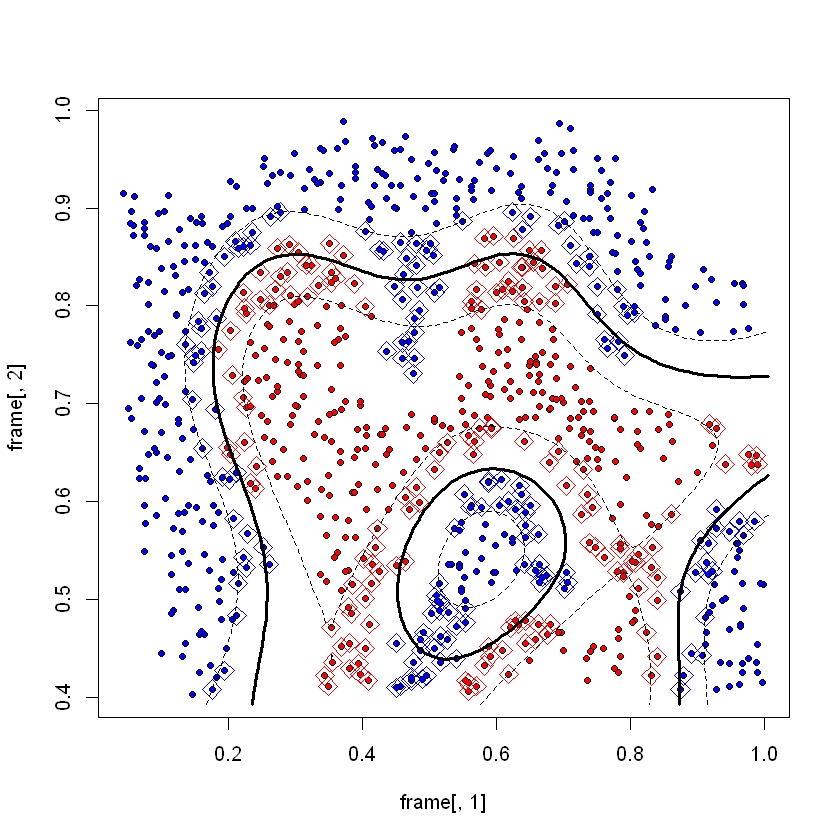

In [10]:
svm = ksvm( y ~ x2 + x1, data=df, type="C-svc", kernel='rbfdot' )
svm

showSVM(svm, df)

Remember that the Gaussian kernel measures the similarity between a pair of examples, and it is parameterized by the inverse bandwidth $\gamma$, which determines how fast the similarity metric decreases to $0$ as the examples are further apart.

*** A large value of $\gamma$ tells the SVM to closely follow the samples. ***

You can specify a different value of $\gamma$ with the option **kpar**.

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.2 

Number of Support Vectors : 459 

Objective Function Value : -422.9136 
Training error : 0.162225 

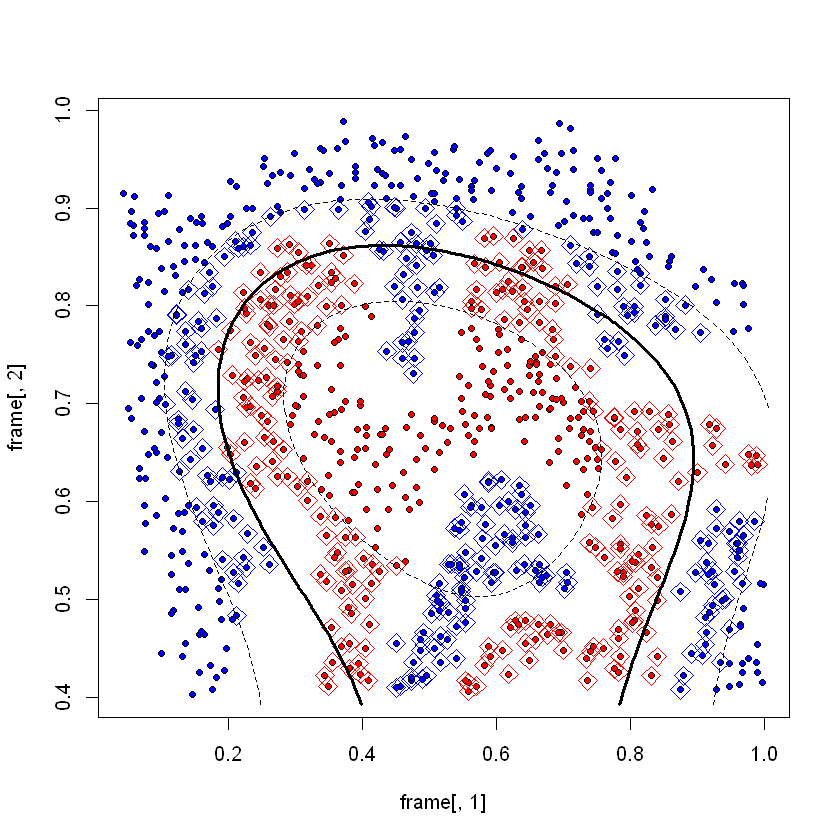

In [14]:
gamma = 0.2

svm = ksvm( y ~ x2 + x1, data=df, type="C-svc", kernel='rbfdot', kpar=list(sigma=gamma) )
svm

showSVM(svm, df)


---

### Question 2
Your task is to try different values of $\gamma$ on this dataset. 
- Can you set $\gamma$ such that most of the samples are correctly classified? 
- In terms of fitting, what does it happen when $\gamma$ is too small or too big? 

---

## Cross-validation

In this last exercise, you will gain more practical skills on how to use a SVM with the Gaussian kernel. 

Load the third dataset (which is non-separable): 

       x1                 x2                 y         
 Min.   :-0.59677   Min.   :-0.65790   Min.   :0.0000  
 1st Qu.:-0.28790   1st Qu.:-0.31389   1st Qu.:0.0000  
 Median :-0.13030   Median :-0.05292   Median :1.0000  
 Mean   :-0.13025   Mean   :-0.05974   Mean   :0.5024  
 3rd Qu.: 0.01382   3rd Qu.: 0.19269   3rd Qu.:1.0000  
 Max.   : 0.29724   Max.   : 0.57339   Max.   :1.0000  

       x1                 x2                 y        
 Min.   :-0.49949   Min.   :-0.79482   Min.   :0.000  
 1st Qu.:-0.28236   1st Qu.:-0.47265   1st Qu.:0.000  
 Median :-0.06343   Median :-0.05426   Median :0.000  
 Mean   :-0.08734   Mean   :-0.10237   Mean   :0.435  
 3rd Qu.: 0.12287   3rd Qu.: 0.24627   3rd Qu.:1.000  
 Max.   : 0.29092   Max.   : 0.59753   Max.   :1.000  

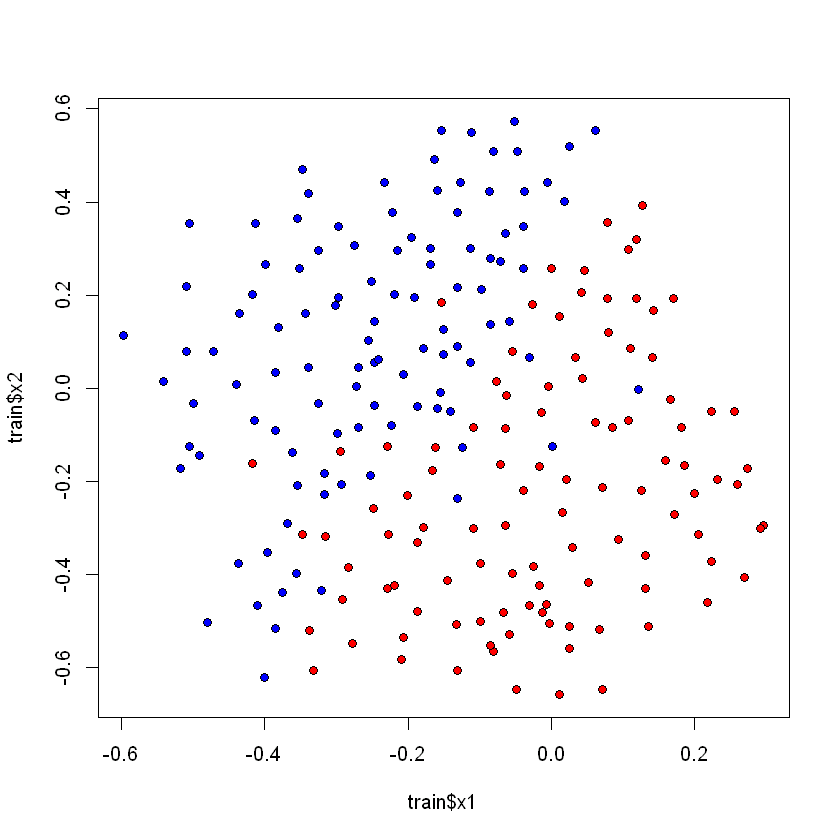

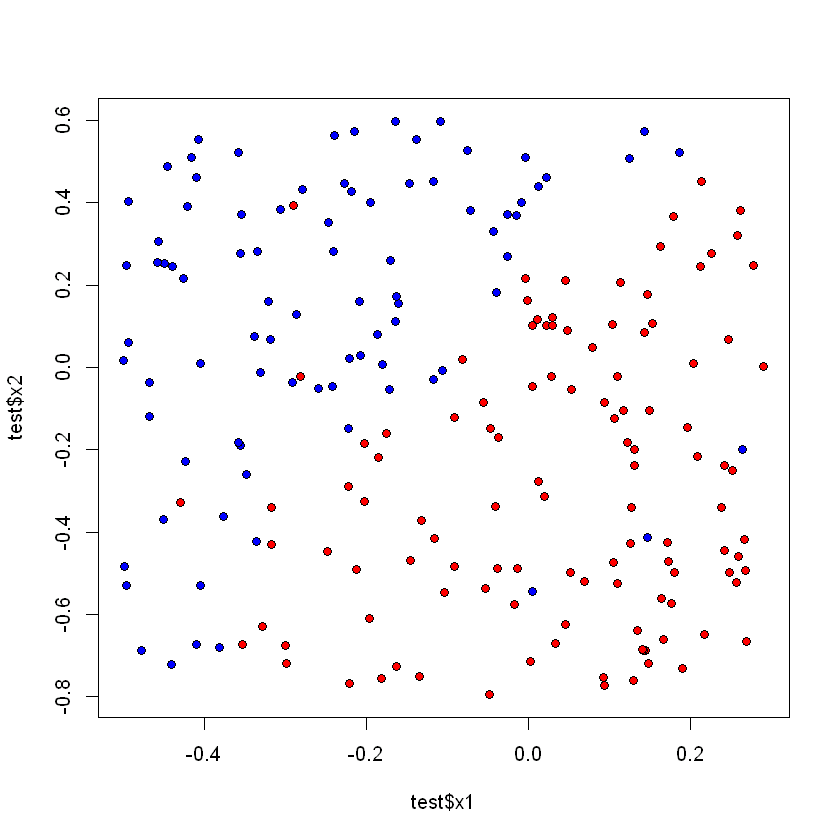

In [16]:
load("data3")

summary(train)
summary(test)

plot( train$x1, train$x2, pch=21, bg=c("red","blue")[train$y+1] )
plot(  test$x1,  test$x2, pch=21, bg=c("red","blue")[ test$y+1] )

The provided dataset contains two frames: 
 - **train** holds the training set
 - **test**  holds the validation set. 

Remember that the validation set is not used for training the SVM, but only for evaluating the classification error.

   y
      0   1
  0 107   6
  1   4  83

[1] 0.95

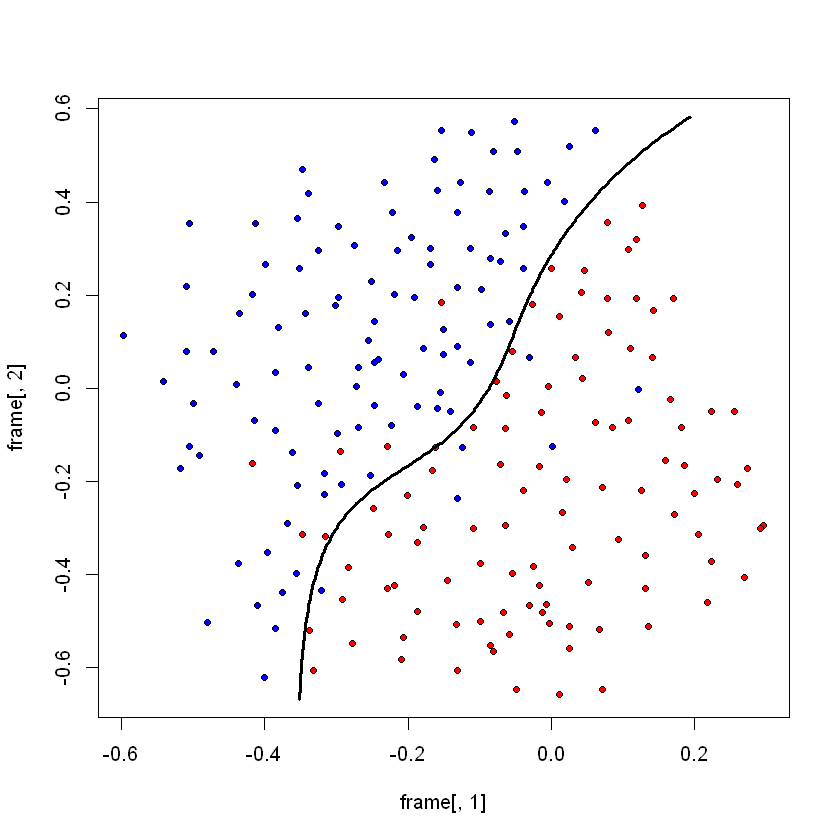

In [17]:
lambda = 1
gamma = 1

# training
svm = ksvm( y ~ x2 + x1, data=train, type="C-svc", C=lambda, kernel='rbfdot', kpar=list(sigma=gamma) )

# visualize
showSVM(svm, train, FALSE, FALSE)

# prediction
y = predict(svm, test)

# compute accuracy
table(test$y, y)
sum(y==test$y)/length(test$y)

---

### Question 3
Your task is to find the values of $\lambda$ and $\gamma$ such that the trained SVM obtains the best accuracy on the validation set. For both parameters, we suggest trying values in multiplicative steps: $0.01, 0.03, 0.1, 0.3, 1, 3, 10$. Note that you should try all possible pairs of values, so you will end up training a total of $7^2 = 49$ different SVMs. What are the best values of $\lambda$ and $\gamma$?

*Hint :* To automatize the process, you can use two nested loops (see below for an example).

In [18]:
steps = c( 0.01, 0.03, 0.1, 0.3, 1, 3, 10 )
for ( i in 1:length(steps) ) {
    for ( j in 1:length(steps) ) {
        lambda = steps[i]
        gamma  = steps[j]
        
        # add code here
    }
}

---

# Neural networks

In the second part of this laboratory session, you will gain an intuition of how neural networks work. 

You will be using one of the previous example 2D dataset.

In [ ]:
load("data2")

summary(df)

plot( df$x1, df$x2, pch=21, bg=c("red","blue")[df$y+1] )

You can see in the scatter plot that the samples suggests a nonlinear split. 

By using a multilayer neural network, you will be able to build a nonlinear classifier that can perform reasonably well for the dataset. 

In order to train a neural network, you need the package **nnet**.

In [ ]:
#install.packages("nnet")

library(nnet)

Then, you can train a network with the function **nnet**.

In [ ]:
neurons = 2

net = nnet( y ~ x2 + x1, data=df, size = neurons, maxit = 1000, decay = 5e-4, trace = FALSE)
net


To gain a better insight into the classification, you can visualize how the trained network splits the data.

The function defined below allows you to do exactly that.

In [ ]:
showNN <- function(net, frame)
{
    # create a grid of points
    hs <- 0.01
    x1_min <- min( frame[,1]) - 0.01 
    x1_max <- max( frame[,1]) + 0.01
    x2_min <- min( frame[,2]) - 0.01 
    x2_max <- max( frame[,2]) + 0.01
    grid <- as.matrix(expand.grid( seq(x1_min, x1_max, by = hs), seq(x2_min, x2_max, by =hs) ))
    grid <- data.frame( x1 = grid[,1], x2 = grid[,2] )
    
    # predict with the neural network
    y = predict(net, newdata = grid)  
       
    # visualize contour
    x1 = seq(x1_min,x1_max,by=hs)
    x2 = seq(x2_min,x2_max,by=hs)
    y <- matrix(y, nrow = length(x1), byrow = FALSE)
    contour( x1, x2, y, levels=0.5, lwd = 3, drawlabels = FALSE )
    
    # visualize colors
    #points( grid[,1], grid[,2], pch=".", cex=1, col = ifelse(y>0.5, "blue", "red") )
    
    # visualize points
    points( frame[,1], frame[,2], pch=21, cex=0.8, bg=c("red","blue")[frame[,3]+1] )
}

showNN(net, df)

---

### Question 4

Your task is to train various networks with different numbers of hidden neurons. 
 - Can you set a value such that all samples are correctly classified? 
 - In terms of fitting, what does it happen when the hidden neurons are too few or too many? 
 - In your opinion, should the number of hidden neurons be small or large in order to have a classifier that performs well on new data?
---

# Spam classification



Many email services today provide spam filters that are able to classify emails with high accuracy. In this part of the assignment, you will use SVMs to classify if a given email is spam or non-spam. The dataset is based on a subset of the *SpamAssassin Public Corpus*: http://spamassassin.apache.org/publiccorpus/

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Hereafter, you can see a sample email that contains a URL, an email address, numbers, and dollar amounts:

In [ ]:
original_email = paste( readLines("emailSample1.txt"), collapse=" " )

print(original_email)

## Preprocessing

While many emails would contain similar types of entities (e.g., numbers, URLs, or email addresses), the specific entities (e.g., the specific URL or dollar amount) will be different in almost every email. Therefore, one method often employed in processing emails is to normalize these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string "httpaddr". This has the effect of letting the spam classifier make a decision based on the presence of any URL, rather than a specific URL. This typically improves the performance of a spam classifier, since spammers randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small. 

In the function **normalizeEmail** (given below), we implemented the following preprocessing steps.

- **Lower-casing**: The entire email is converted into lower case, so that capitalization is ignored (e.g., *IndIcaTE* is treated the same as *Indicate*).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text *httpaddr*.

- **Normalizing Emails**: All email addresses are replaced with the text *emailaddr*.

- **Normalizing Numbers**: All numbers are replaced with the text *number*.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text *dollar*.

- **Word Stemming**: Words are reduced to their stemmed form. For example, *discount*, *discounts*, *discounted* and
*discounting* are all replaced with "discount". Sometimes, the Stemmer actually strips off additional characters from the end, so *include*, *includes*, *included*, and *including* are all replaced with "includ".

- **Removal of non-words**: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

In [ ]:
#install.packages("tm")
#install.packages("SnowballC")
library(tm)
library(SnowballC)   

normalizeEmail <- function (email)
{      
    # normalization
    email = tolower(email)
    email = gsub('<[^<>]+>'              , ' '        , email, perl=TRUE)   # Strip all HTML
    email = gsub('[0-9]+'                , 'number'   , email, perl=TRUE)   # Handle number
    email = gsub('(http|https)://[^\\s]*', 'httpaddr' , email, perl=TRUE)   # Handle URLs
    email = gsub('[^\\s]+@[^\\s]+'       , 'emailaddr', email, perl=TRUE)   # Handle email addresses
    email = gsub('[$]+'                  , 'dollar'   , email, perl=TRUE)   # Handle $ sign
    
    # stemming
    email = Corpus( VectorSource(email) )
    email = tm_map(email, removePunctuation)
    #email = tm_map(email, removeWords, stopwords("english") )
    email = tm_map(email, stemDocument)
    email = tm_map(email, stripWhitespace)
    
    # convert to a string
    email = tm_map(email, PlainTextDocument)  
    email = as.character( email[[1]] )
    
    return (email)
}

The result of these preprocessing steps is shown below. 

While preprocessing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

In [ ]:
normalized_email = normalizeEmail(original_email)

print(original_email)
print("------")
print(normalized_email)

## Vocabulary list

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out. For this assignment, we have chosen only the most frequently occurring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the model to over-fit our training set. 

The complete vocabulary list is in the file "vocab.txt", and also shown below:

Our vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus, resulting in a list of 1899 words. In practice, a vocabulary list with about 10'000 to 50'000 words is often used. Given the vocabulary list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary list. 

In the function **mapEmail** (given below), we implemented the code to perform the mapping.

In [ ]:
mapEmail <- function (email)
{   
    # Load Vocabulary
    vocabList = read.table("vocab.txt")[,2]
    
    # Init return value
    indices = c();
    
    # split words
    email = unlist(strsplit(email, ' '))
    
    # scan the email words
    for( str in email )
    {
        i = grep( paste("^",str,"$", sep=""), vocabList )
        
        indices = c( indices, i )
    }
    
    return (indices)
}

Hereafter, you can see the mapping for the sample email previously considered. Specifically, in the sample email, the word *anyone* was first normalized to *anyon* and then mapped onto the index 86 in the vocabulary list:

In [ ]:
mapped_email = mapEmail(normalized_email)

print(mapped_email)

## Feature extraction

You will now implement the feature extraction that converts each email into a vector $x\in\mathbb{R}^K$, where $K$ is the number of words in the vocabulary list. Specifically, if the $i$-th word in the vocabulary is present in the email, you have $x_i=1$, otherwise $x_i = 0$. Thus, for a typical email, the feature vector is like:

$$
x = \left[0\;\dots\;1\;0\;\dots\;1\;0\;\dots\;0\right]^\top.
$$

---
### Question 5

Your task is to complete the code in the function **extractEmail** to generate a feature vector for an email, given the word indices. 

In [ ]:
extractEmail <- function(email)
{
    # Total number of words in the dictionary
    n = 1899;

    # You need to return the following variables correctly.
    x = rep(0, n);
    
    # ... ADD CODE HERE ...
    
    return (x)
}

---

Once you have done it, test the function on a sample email as follows. You should see that the feature vector had length 1899 and 45 non-zero entries.

In [ ]:
file_name = "emailSample1.txt"

# read an email
email = paste( readLines(file_name), collapse=" " )

# process the email
email = normalizeEmail(email)
email = mapEmail(email)
email = extractEmail(email)

# show statistics
cat( sprintf('Length of feature vector: %d\n', length(email)) );
cat( sprintf('Number of non-zero entries: %d\n', sum(email > 0)) );

## SVM training

You are now ready to train a SVM for spam classification. We have already preprocessed a **training set** and a **validation set**, where each original email was processed using the previous functions.

In [ ]:
load("spamTrain")
load("spamTest")

After loading the training set, you can proceed to train a linear SVM:

In [ ]:
library(kernlab)

lambda = 0.1;
svm = ksvm( y ~ ., data=spamTrain, type="C-svc", kernel='vanilladot', C=lambda, scaled=FALSE )
svm

and compute the classification accuracy on the training set:

In [ ]:
# prediction
y = predict(svm, spamTrain)

# compute accuracy
table( spamTrain$y, y )
acc = sum( y == spamTrain$y ) / length(y)

cat( sprintf('Training Accuracy: %2.3f%%\n', acc * 100) );

---
### Question 6

We would like to know which words the trained SVM thinks are the most predictive of spam. Remember that an email $x\in\mathbb{R}^K$ is classified with the rule 

$$y = \operatorname{sign}\left( \theta_0 + \theta^\top x \right)$$

Hence, the largest positive components in the vector $\theta$ correspond to the most indicative words of spam. 

However, the function **ksvm** solves the dual SVM formulation, returning a vector $\alpha$ which is related to $\theta$ by the following equation:
$$
\theta = \sum_{n=1}^N \alpha_n \, y_n \, x_n
$$
where $x_n \in \mathbb{R}^K$ is a training sample, $y_n \in \{-1,1\}$ denotes the corresponding class, and $N$ is the size of the training set.

The above formula can be translated in R as follows:

In [ ]:
theta = colSums( coef(svm)[[1]] * spamTrain[unlist(alphaindex(svm)),1:ncol(spamTrain)-1])

from which we can infer the most indicative words of spam:

In [ ]:
vocabList = read.table("vocab.txt")[,2]

#install.packages("wordcloud")
library(wordcloud)

wordcloud( vocabList, theta, max.words=100, rot.per=0.2, colors=brewer.pal(4, "Dark2"))

Which are the words associated to the 10 biggest components of $\theta$ ?

In [ ]:
d = sort(theta, decreasing=TRUE, index.return = TRUE)
i = d$ix[1:10]

# add code here #

---
### Question 7
Now that you have trained a spam classifier, you can start trying it out on your own emails. We have included two non-spam emails (*emailSampleXXX.txt*) and two spam emails (*spamSampleXXX.txt*). The following code illustrates how to classify an email with the trained SVM.
- Does the classifier get right the other emails we provided? 
- Based on the answer from the previous question, can you craft an email that is classified as spam?

In [ ]:
processEmail <- function(x)
{
    x = normalizeEmail(x)
    x = mapEmail(x)
    x = extractEmail(x)
    return(x)
}

readFile <- function(x)
{
    email = paste( readLines(x), collapse=" " )   
    return(email)
}

email = readFile('emailSample1.txt')  # CHANGE THE NAME WITH: emailSample1, emailSample3, spamSample1, spamSample2.
email = processEmail(email)

z = predict( svm, rbind(email) )

cat( sprintf('Is it spam (0=no, 1=yes)? %d\n', z) )

# TODO: craft an email that will be classified as spam

---
### Question 8
Finally, your task is to find the value of $\lambda$ leading to the best accuracy on the validation set. 

You should see that the classifier gets a test accuracy of 98.5\% or more.

In [ ]:
values = c(...)           # complete the code

for( lambda in values )
{
    svm = ksvm(...)        # complete the code
    
    y = predict(svm, ...)  # complete the code
    
    acc = ...              # complete the code
    
    cat( sprintf('Training Accuracy: %2.3f%%\n', acc * 100) );
}